In [1]:
import pandas as pd
import bz2
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
DATA_FOLDER = 'data/'
SPEAKER_ATTRIBUTES_DATA = DATA_FOLDER+"speaker_attributes.parquet"

KNOWN_SPEAKER = DATA_FOLDER+"100000_knownspeakers_2019"
KNOWN_SPEAKER_DATA = KNOWN_SPEAKER+".json.bz2"
RETURN_FILE_DATA = KNOWN_SPEAKER+"_with_attributes.json.bz2"

In [3]:
#Creation of a json file from df_new
df_new = pd.read_json(RETURN_FILE_DATA)

In [4]:
#Drop rows with None as gender
df_new.dropna(axis = 0, subset = ['gender'], inplace = True)

In [5]:
#Check if it has removed rows: it does
df_new.shape[0]

98277

In [6]:
#Keep only the first gender in the list 
df_new['gender'] = df_new['gender'].apply(lambda x: x[0])

In [ ]:
#only keeping the first probability corresponding to the speaker with the highest proba, associated as the speaker for the quotation.
df_new['probas']= df_new['probas'].apply(lambda x: x[0][1])

#convert this probability in a float number
df_new['probas']= df_new['probas'].apply(lambda x: float(x))

#drop the lines where the probability is lower than 0.7, considered as uncertainities.
df_new = df_new.drop(df_new[df_new.probas < 0.7].index)
df_new

In [7]:
#Group the data by gender
speaker_grouped = df_new.groupby(df_new.gender)

In [8]:
#Look at the number of quotations per gender
speaker_grouped.speaker.count().sort_values(ascending = False)

gender
Q6581097     79839
Q6581072     18251
Q1052281        61
Q48270          56
Q18116794       41
Q15145779        9
Q2449503         9
Q12964198        3
Q1097630         2
Q15145778        2
Q1984232         2
Q27679766        1
Q505371          1
Name: speaker, dtype: int64

In [9]:
#Keep only the 2 most represented gender and group the other in "others"
major_gender = speaker_grouped.speaker.count().sort_values(ascending = False)[0:2]
others = speaker_grouped.speaker.count().sort_values(ascending = False)[2:]

In [10]:
#Create a new serie for the barplot
other_group = pd.Series([others.values.sum()], index=['Others'])
major_gender_and_others = major_gender.append(other_group)

##TODO: try to label with 'Male' and 'Female' not manually! (use the wiki code to get the name) 

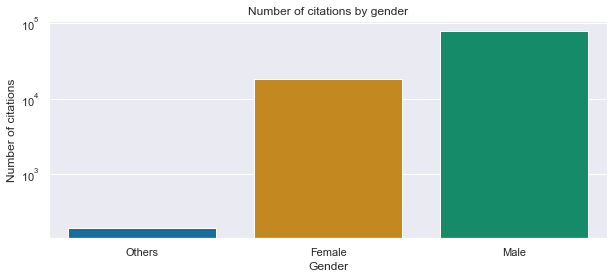

In [11]:
#Barplot to see how many quotations attributed to each gender
sns.set(rc = {'figure.figsize':(10,4)})
sns.set_palette('colorblind')
labels = ['Others', 'Female', 'Male']
ax = sns.barplot(x = major_gender_and_others.index, y = major_gender_and_others.values, data=major_gender_and_others)
ax.set_xticklabels(labels);
ax.set_yscale("log")
plt.title('Number of citations by gender');
plt.ylabel('Number of citations');
plt.xlabel('Gender');

**Be careful, this plot has log scale in y-axis.**


We see that there is only a few citations linked to speaker with gender other than 'male' or 'female'. For this reason, we will focus only on male and female gender, in order to examine the differences between them.

In [12]:
#Drop the rows having a gender other than the 2 most represented
df_new.drop(df_new[
        df_new['gender'].isin(major_gender.index) == False].index, inplace = True)

In [13]:
df_new.shape[0]

98090

In [14]:
#Group again by gender, now that only 2 groups remains
speakers_MF = df_new.groupby(df_new.gender)

In [15]:
#Count the number of occurences by gender (quotations*occurences)
citations_by_gender = speakers_MF.numOccurrences.sum().sort_values(ascending = False)

##TODO: try to label with 'Male' and 'Female' not manually! (use the wiki code to get the name) 


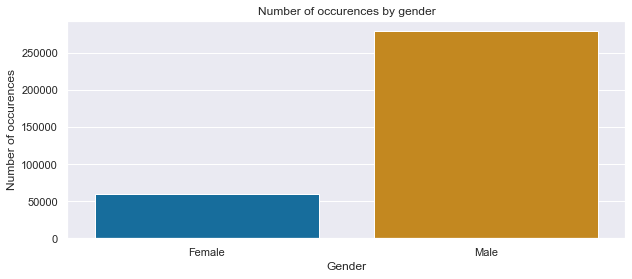

In [16]:
#Barplot representing the number of occurences by gender 
sns.set(rc = {'figure.figsize':(10,4)})
sns.set_palette('colorblind')
labels = ['Female', 'Male']
ax = sns.barplot(x = citations_by_gender.index, y = citations_by_gender.values, data=citations_by_gender)
ax.set_xticklabels(labels);
plt.title('Number of occurences by gender');
plt.ylabel('Number of occurences');
plt.xlabel('Gender');